# Predicting Industrial Machine Downtime: Level 3

## 📖 Background
You work for a manufacturer of high-precision metal components used in aerospace, automotives, and medical device applications. Your company operates three different machines on its shop floor that produce different sized components, so minimizing the downtime of these machines is vital for meeting production deadlines.

Your team wants to use a data-driven approach to predicting machine downtime, so proactive maintenance can be planned rather than being reactive to machine failure. To support this, your company has been collecting operational data for over a year and whether each machine was down at those times.

In this third level, you're going to develop a predictive model that could be combined with real-time operational data to detect likely machine failure. This level is aimed towards advanced learners. If you want to challenge yourself a bit less, check out the other levels!

## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 💪 Competition challenge

Create a report that covers the following:
1. Train and evaluate a predictive model to predict machine failure.
2. Which dataset features are the strongest predictors of machine failure?
3. Are your predictions more accurate if you model each machine separately?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [ ]:
# install necessary libraries
# !pip install sweetviz
# !pip install numpy --upgrade numpy
# !pip install ydata-profiling
# !pip install catboost
# !pip install xgboost
# !pip install scikit-optimize

In [1]:
# import necessary libraries
from ydata_profiling import ProfileReport
import my_functions as mf
import joblib
import pandas as pd
from my_functions import split_by_machine_type, feature_importance_diff_machines

In [2]:
downtime = pd.read_csv('data/machine_downtime.csv')
downtime.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [3]:
downtime.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


## EDA

In [4]:
# prep data for EDA
downtime = mf.prep_for_eda(downtime)

In [5]:
downtime.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,month_sin,month_cos
0,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,-2.449294e-16,1.000000e+00
1,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,-2.449294e-16,1.000000e+00
2,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,-2.449294e-16,1.000000e+00
3,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,5.000000e-01,-8.660254e-01
4,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,1.000000e+00,6.123234e-17


In [ ]:
# generate HTML file for cursory EDA
profile = ProfileReport(downtime, title = "Profile Report")
profile.to_file("EDA.html")

In [ ]:
# compare class distributions for the Target Variable: Downtime
class_failure = ProfileReport(downtime.loc[downtime['Downtime'] == "Machine_Failure"], title = "Machine Failure")
class_no_failure = ProfileReport(downtime.loc[downtime['Downtime'] == "No_Machine_Failure"], title = "No Machine Failure")

comparison_report = class_failure.compare(class_no_failure)
comparison_report.to_file("Target_Class_Comparison.html")

## Preliminary Findings

#### Correlation

- Downtime is highly correlated with: Coolant Pressure, Cutting, Hydraulic Pressure, Spindle Speed, and Torque.
- The distributions of the above features vary signficantly by value of Downtime

#### Distribution
- Air System Pressure, Hydraulic Oil Temperature, Spindle Bearing Temperature, Spindle Vibration, Tool Vibration, and Voltage seem to be normally distributed.

#### Class Imbalance
- The target Downtime is balanced almost 50% per class.

#### Missing Values
- There are several missing values. Coolant Temperature seems to be missing when Coolant Temperature or Coolant Pressure is missing.
- There are many more missing values for the above fields when there is No Machine Failure than when there is one.


# Run Models and CV

In [6]:
# split data into predictors and target
X, y = mf.split_data(downtime)


## Random Forest

In [ ]:
# print the best parameters
rf_metrics, best_rf, X_adj, y_adj = mf.get_best_params_and_score("RandomForest", X, y)
# rf_metrics

In [7]:
# load the best model
best_rf = joblib.load('outputs/BestRandomForest.pkl')
X_rf = joblib.load('outputs/X_RandomForest.pkl')
y_rf = joblib.load('outputs/y_RandomForest.pkl')



Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)    0.281061
1       Hydraulic_Pressure(bar)    0.261944
12                  Cutting(kN)    0.157829
2         Coolant_Pressure(bar)    0.152221
9            Spindle_Speed(RPM)    0.070589
4           Coolant_Temperature    0.028367
6   Spindle_Bearing_Temperature    0.006961
8                Tool_Vibration    0.006870
7             Spindle_Vibration    0.006628
5     Hydraulic_Oil_Temperature    0.006540
10               Voltage(volts)    0.005765
3      Air_System_Pressure(bar)    0.005614
13                    month_sin    0.004185
14                    month_cos    0.004110
0                    Machine_ID    0.001315


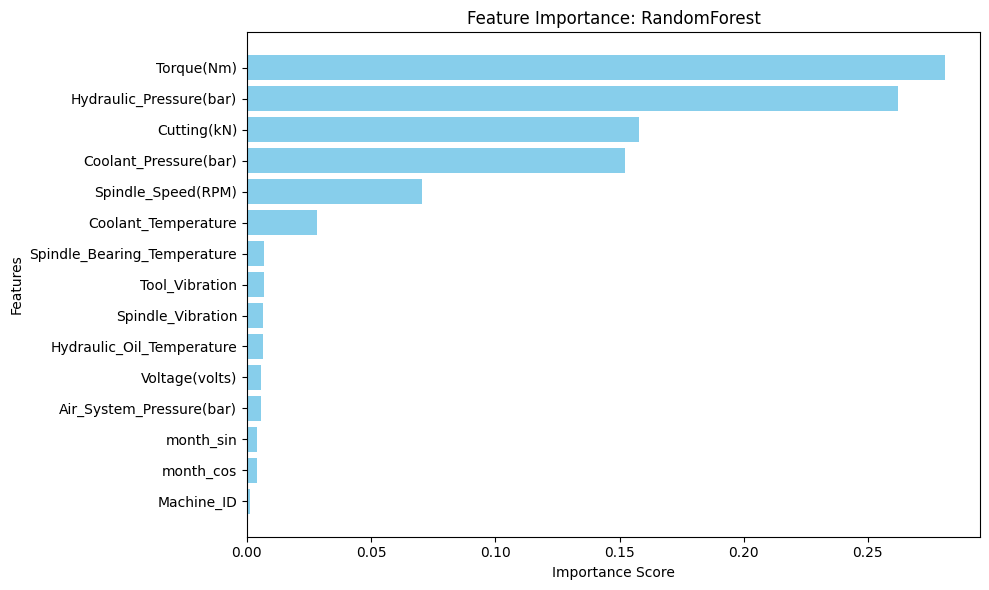

,Feature,Importance
11,Torque(Nm),0.281061
1,Hydraulic_Pressure(bar),0.261944
12,Cutting(kN),0.157829
2,Coolant_Pressure(bar),0.152221
9,Spindle_Speed(RPM),0.070589
4,Coolant_Temperature,0.028367
6,Spindle_Bearing_Temperature,0.006961
8,Tool_Vibration,0.006870
7,Spindle_Vibration,0.006628
5,Hydraulic_Oil_Temperature,0.006540


In [9]:
# feature importances
mf.feature_importance("RandomForest", X_rf, y_rf, best_rf)

## XGBoost

In [ ]:
# xgboost best parameters
xgb_metrics, best_xgb, X_adj, y_adj = mf.get_best_params_and_score("XGBoost", X, y)

In [10]:
# load the best model
best_xgb = joblib.load('outputs/BestXGBoost.pkl')
X_gbm = joblib.load('outputs/X_XGBoost.pkl')
y_gbm = joblib.load('outputs/y_XGboost.pkl')

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importances (sorted):
                        Feature  Importance
9            Spindle_Speed(RPM)    0.401337
13                    month_sin    0.179623
1       Hydraulic_Pressure(bar)    0.159557
12                  Cutting(kN)    0.091500
11                   Torque(Nm)    0.080554
14                    month_cos    0.026842
4           Coolant_Temperature    0.021142
5     Hydraulic_Oil_Temperature    0.008966
6   Spindle_Bearing_Temperature    0.008040
2         Coolant_Pressure(bar)    0.007018
8                Tool_Vibration    0.006163
0                    Machine_ID    0.003792
7             Spindle_Vibration    0.002551
10               Voltage(volts)    0.001778
3      Air_System_Pressure(bar)    0.001137


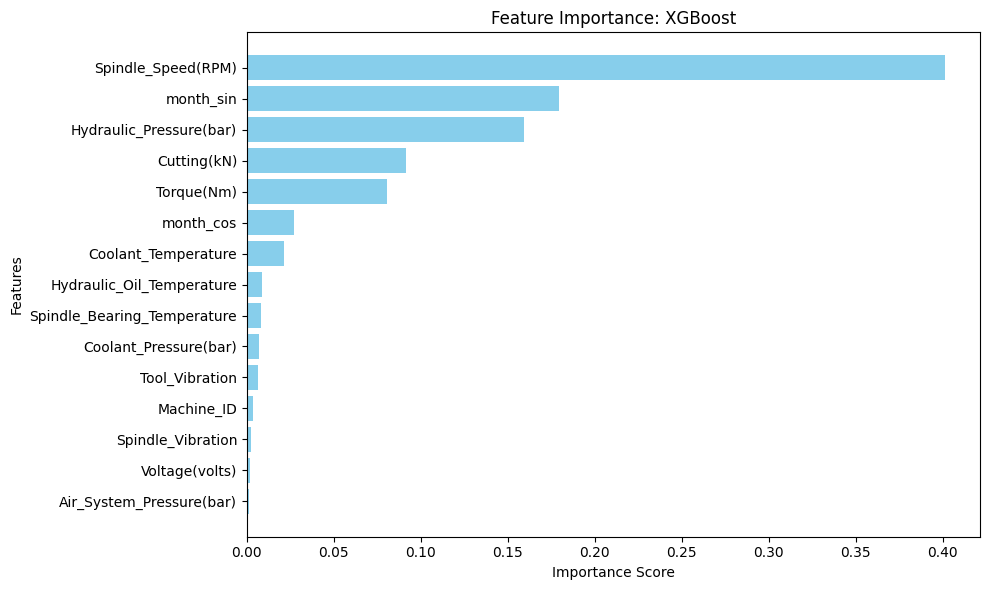

,Feature,Importance
9,Spindle_Speed(RPM),0.401337
13,month_sin,0.179623
1,Hydraulic_Pressure(bar),0.159557
12,Cutting(kN),0.091500
11,Torque(Nm),0.080554
14,month_cos,0.026842
4,Coolant_Temperature,0.021142
5,Hydraulic_Oil_Temperature,0.008966
6,Spindle_Bearing_Temperature,0.008040
2,Coolant_Pressure(bar),0.007018


In [11]:
# feature importances
mf.feature_importance("XGBoost", X_gbm, y_gbm, best_xgb)

## CatBoost

In [ ]:
# xgboost best parameters
cat_metrics, best_cat, X_cat, y_cat = mf.get_best_params_and_score("CatBoost", X, y)


In [12]:
# load the best model
best_cat = joblib.load('outputs/BestCatBoost.pkl')
X_cat = joblib.load('outputs/X_CatBoost.pkl')
y_cat = joblib.load('outputs/y_Catboost.pkl')

0:	learn: 0.6614295	total: 166ms	remaining: 45.2s
1:	learn: 0.6307390	total: 201ms	remaining: 27.3s
2:	learn: 0.6010011	total: 231ms	remaining: 20.9s
3:	learn: 0.5727755	total: 393ms	remaining: 26.5s
4:	learn: 0.5489702	total: 439ms	remaining: 23.6s
5:	learn: 0.5245124	total: 468ms	remaining: 20.9s
6:	learn: 0.4988391	total: 548ms	remaining: 20.9s
7:	learn: 0.4765580	total: 579ms	remaining: 19.2s
8:	learn: 0.4575620	total: 610ms	remaining: 18s
9:	learn: 0.4422824	total: 644ms	remaining: 17s
10:	learn: 0.4279866	total: 676ms	remaining: 16.2s
11:	learn: 0.4167951	total: 709ms	remaining: 15.5s
12:	learn: 0.3956432	total: 747ms	remaining: 15s
13:	learn: 0.3711409	total: 782ms	remaining: 14.5s
14:	learn: 0.3498043	total: 820ms	remaining: 14.2s
15:	learn: 0.3390058	total: 857ms	remaining: 13.8s
16:	learn: 0.3233925	total: 895ms	remaining: 13.5s
17:	learn: 0.3113440	total: 933ms	remaining: 13.3s
18:	learn: 0.2999023	total: 974ms	remaining: 13.1s
19:	learn: 0.2886554	total: 1.01s	remaining: 12

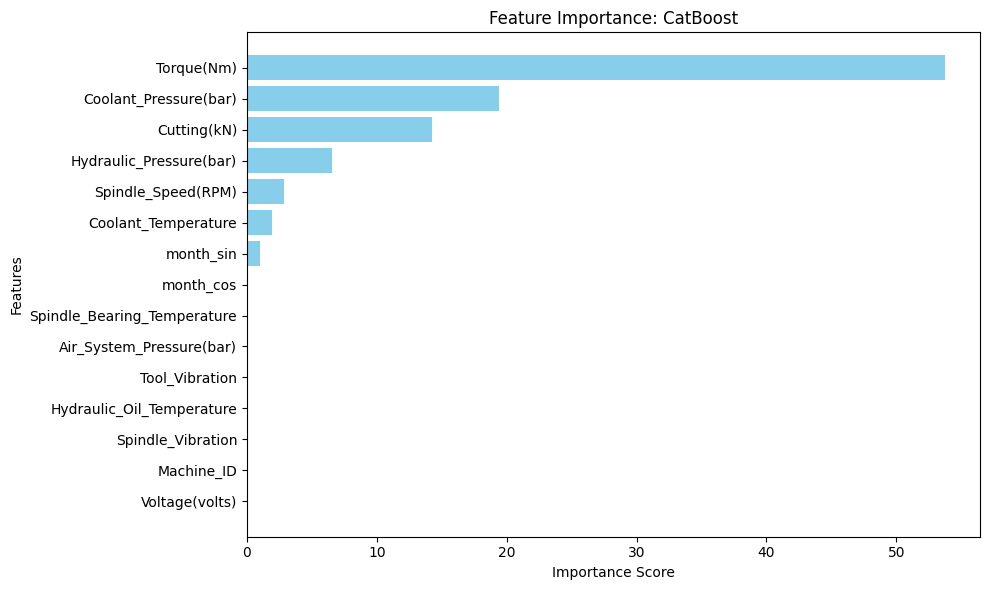

,Feature,Importance
11,Torque(Nm),53.754656
2,Coolant_Pressure(bar),19.431634
12,Cutting(kN),14.273679
1,Hydraulic_Pressure(bar),6.544468
9,Spindle_Speed(RPM),2.861411
4,Coolant_Temperature,1.963460
13,month_sin,0.973014
14,month_cos,0.097037
6,Spindle_Bearing_Temperature,0.058939
3,Air_System_Pressure(bar),0.015885


In [13]:
# feature importances
mf.feature_importance("CatBoost", X_cat, y_cat, best_cat)

# By Machine

In [14]:
# split dataset by machine
downtime_l1, downtime_l2, downtime_l3 = split_by_machine_type(downtime)

X_l1, y_l1 = mf.split_data(downtime_l1)
X_l2, y_l2 = mf.split_data(downtime_l2)
X_l3, y_l3 = mf.split_data(downtime_l3)

## Random Forest

### L1

In [15]:
# return the metrics for RF
l1_rf_metrics, X_l1_rf, y_l1_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l1, y_l1)

{'Makino-L1-Unit1-2013': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9737077175697865
Best Model Average Test Balanced Accuracy: 0.9740842490842491
Best Model Average Test F1-Score: 0.9738480473895545


Feature Importances (sorted):
                        Feature  Importance
1       Hydraulic_Pressure(bar)    0.256995
11                   Torque(Nm)    0.226592
12                  Cutting(kN)    0.188954
2         Coolant_Pressure(bar)    0.159742
9            Spindle_Speed(RPM)    0.085771
4           Coolant_Temperature    0.015715
7             Spindle_Vibration    0.011036
5     Hydraulic_Oil_Temperature    0.010587
8                Tool_Vibration    0.010214
6   Spindle_Bearing_Temperature    0.009194
10               Voltage(volts)    0.008774
3      Air_System_Pressure(bar)    0.007754
14                    month_cos    0.005178
13                    month_sin    0.003493
0                    Machine_ID    0.000000


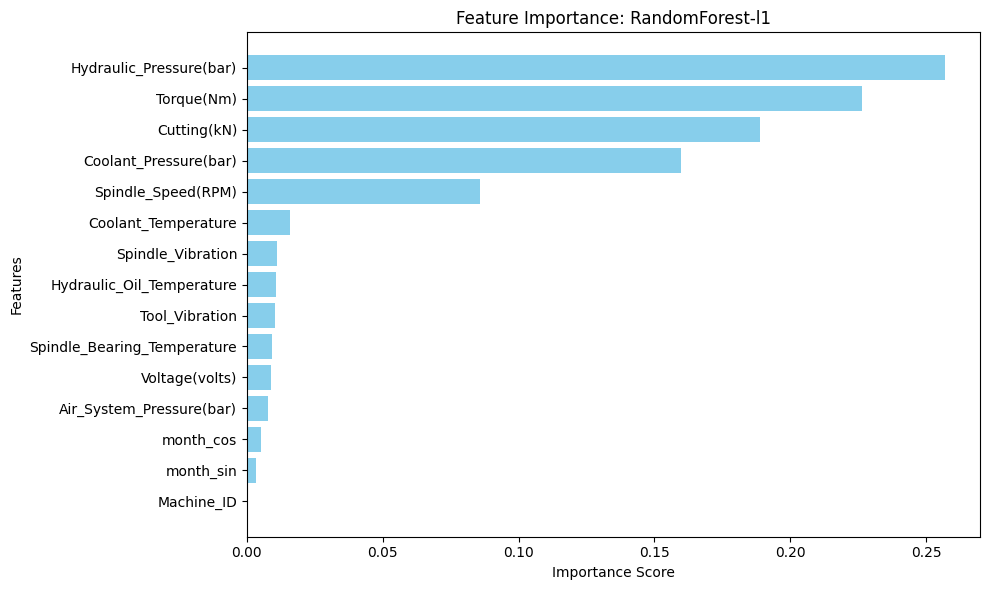

In [16]:
# print the RF feature importances for RF
feature_importance_diff_machines("RandomForest", X_l1_rf, y_l1_rf, best_rf, "l1")

### L2

In [17]:
# return metrics for RF
l2_rf_metrics, X_l2_rf, y_l2_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l2, y_l2 )

{'Makino-L2-Unit1-2015': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9678782301970706
Best Model Average Test Balanced Accuracy: 0.9678680901438419
Best Model Average Test F1-Score: 0.9688583489930191


Feature Importances (sorted):
                        Feature  Importance
12                  Cutting(kN)    0.236589
1       Hydraulic_Pressure(bar)    0.215392
11                   Torque(Nm)    0.196619
2         Coolant_Pressure(bar)    0.167931
9            Spindle_Speed(RPM)    0.063787
4           Coolant_Temperature    0.048909
10               Voltage(volts)    0.012742
6   Spindle_Bearing_Temperature    0.011989
8                Tool_Vibration    0.010563
7             Spindle_Vibration    0.009536
5     Hydraulic_Oil_Temperature    0.009357
3      Air_System_Pressure(bar)    0.008979
13                    month_sin    0.004360
14                    month_cos    0.003246
0                    Machine_ID    0.000000


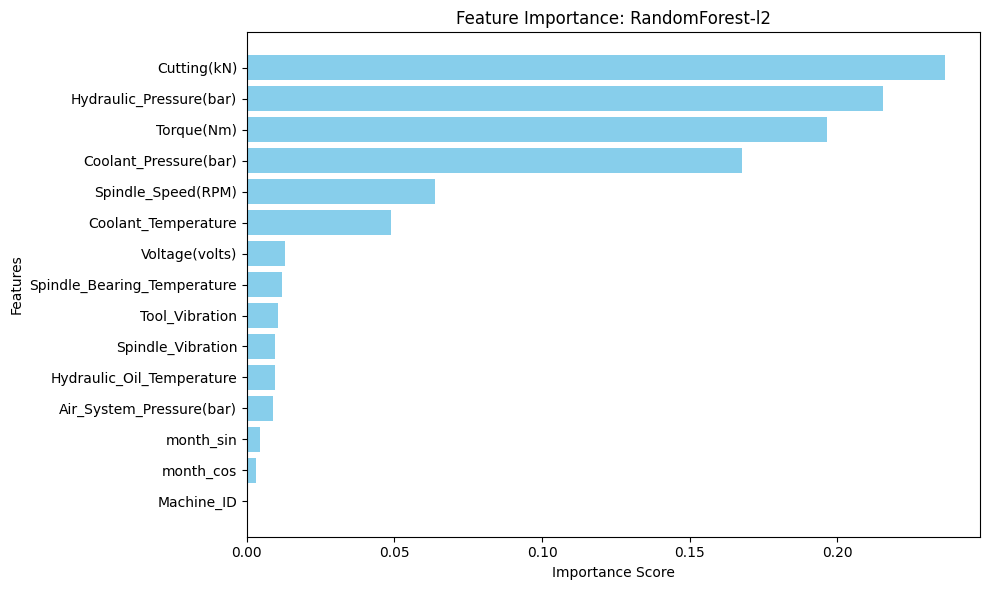

In [18]:
# print feature importances
feature_importance_diff_machines("RandomForest", X_l2_rf, y_l2_rf, best_rf, "l2")

### L3

In [19]:
# return metrics for RF
l3_rf_metrics, X_l3_rf, y_l3_rf = mf.get_score_diff_machines("RandomForest", best_rf, X_l3, y_l3)

{'Makino-L3-Unit1-2015': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}
Best Model Average Test Accuracy: 0.9792682926829268
Best Model Average Test Balanced Accuracy: 0.9794288264167783
Best Model Average Test F1-Score: 0.9797504456327986


Feature Importances (sorted):
                        Feature  Importance
11                   Torque(Nm)    0.299887
1       Hydraulic_Pressure(bar)    0.203663
12                  Cutting(kN)    0.184923
2         Coolant_Pressure(bar)    0.139974
9            Spindle_Speed(RPM)    0.074602
4           Coolant_Temperature    0.024725
6   Spindle_Bearing_Temperature    0.012758
8                Tool_Vibration    0.012113
5     Hydraulic_Oil_Temperature    0.011839
3      Air_System_Pressure(bar)    0.011275
10               Voltage(volts)    0.007879
7             Spindle_Vibration    0.006763
14                    month_cos    0.006391
13                    month_sin    0.003210
0                    Machine_ID    0.000000


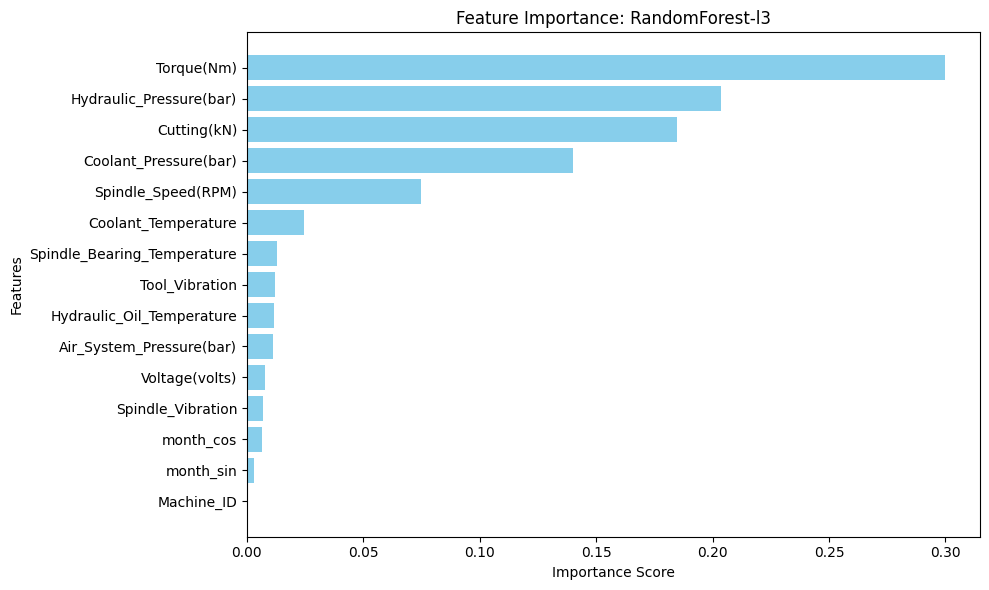

In [20]:
# print feature importances
feature_importance_diff_machines("RandomForest", X_l3_rf, y_l3_rf, best_rf, "l3")

## XGBoost

### L1

In [21]:
# return metrics for XGB
l1_xgb_metrics, X_l1_xgb, y_l1_xgb = mf.get_score_diff_machines("XGBoost", best_xgb, X_l1, y_l1)

{'Makino-L1-Unit1-2013': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Best Model Average Test Accuracy: 0.9794285714285713
Best Model Average Test Balanced Accuracy: 0.9793469708890636
Best Model Average Test F1-Score: 0.978048780487805


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importances (sorted):
                        Feature  Importance
13                    month_sin    0.409874
1       Hydraulic_Pressure(bar)    0.187073
9            Spindle_Speed(RPM)    0.153308
12                  Cutting(kN)    0.102904
11                   Torque(Nm)    0.062005
4           Coolant_Temperature    0.019466
14                    month_cos    0.013558
5     Hydraulic_Oil_Temperature    0.012682
6   Spindle_Bearing_Temperature    0.010287
3      Air_System_Pressure(bar)    0.009394
2         Coolant_Pressure(bar)    0.006034
10               Voltage(volts)    0.005404
7             Spindle_Vibration    0.005130
8                Tool_Vibration    0.002881
0                    Machine_ID    0.000000


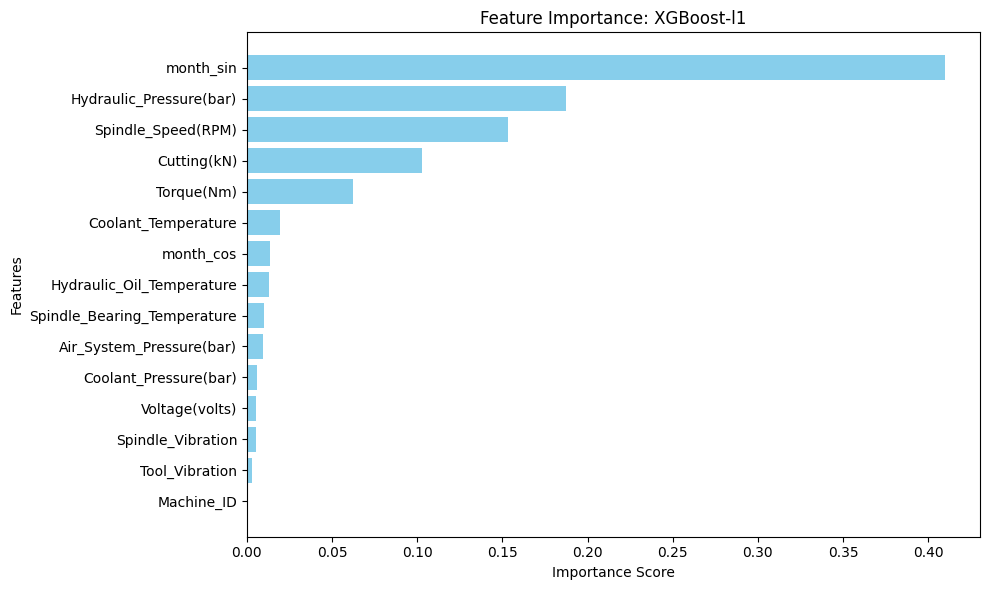

In [22]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l1_xgb, y_l1_xgb, best_xgb, "l1")

### L2

In [23]:
# return metrics fo XGB
l2_xgb_metrics, X_l2_xgb, y_l2_xgb = mf.get_score_diff_machines("XGBoost", best_xgb, X_l2, y_l2)

{'Makino-L2-Unit1-2015': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Best Model Average Test Accuracy: 0.9728241699256192
Best Model Average Test Balanced Accuracy: 0.972882800396824
Best Model Average Test F1-Score: 0.9740620084884737


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importances (sorted):
                        Feature  Importance
9            Spindle_Speed(RPM)    0.340333
13                    month_sin    0.246089
1       Hydraulic_Pressure(bar)    0.154808
12                  Cutting(kN)    0.114308
11                   Torque(Nm)    0.052562
4           Coolant_Temperature    0.032181
14                    month_cos    0.022514
6   Spindle_Bearing_Temperature    0.009316
5     Hydraulic_Oil_Temperature    0.008072
2         Coolant_Pressure(bar)    0.006807
8                Tool_Vibration    0.005217
3      Air_System_Pressure(bar)    0.003564
10               Voltage(volts)    0.002417
7             Spindle_Vibration    0.001814
0                    Machine_ID    0.000000


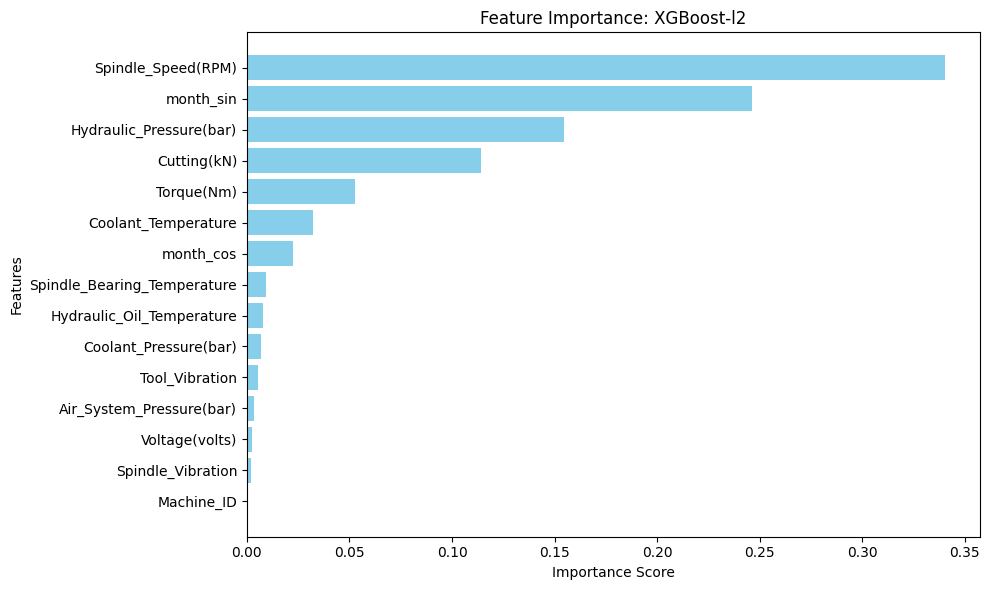

In [24]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l2_xgb, y_l2_xgb, best_xgb, "l2")

### L3

In [25]:
# return metrics for XGB
l3_xgb_metrics, X_l3_xgb, y_l3_xgb = mf.get_score_diff_machines("XGBoost",best_xgb, X_l3, y_l3)

{'Makino-L3-Unit1-2015': 0}
{'Machine_Failure': 0, 'No_Machine_Failure': 1}


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Best Model Average Test Accuracy: 0.9829118659284752
Best Model Average Test Balanced Accuracy: 0.9826404963600085
Best Model Average Test F1-Score: 0.9834277674362909


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature Importances (sorted):
                        Feature  Importance
13                    month_sin    0.310366
1       Hydraulic_Pressure(bar)    0.206546
9            Spindle_Speed(RPM)    0.174425
12                  Cutting(kN)    0.112495
11                   Torque(Nm)    0.074410
14                    month_cos    0.041836
4           Coolant_Temperature    0.034608
8                Tool_Vibration    0.010703
6   Spindle_Bearing_Temperature    0.010607
2         Coolant_Pressure(bar)    0.007627
5     Hydraulic_Oil_Temperature    0.006894
7             Spindle_Vibration    0.004162
3      Air_System_Pressure(bar)    0.003204
10               Voltage(volts)    0.002118
0                    Machine_ID    0.000000


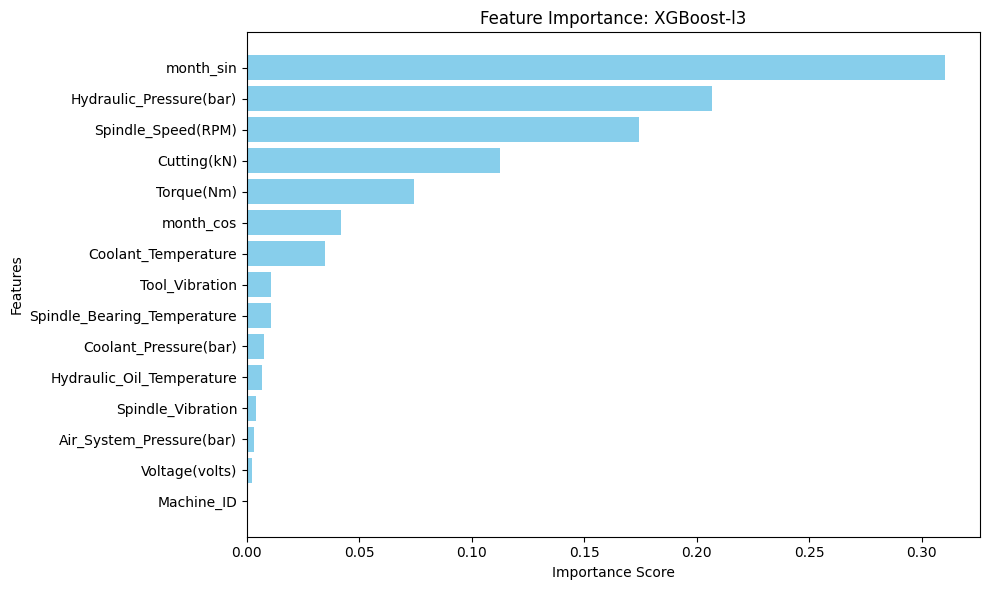

In [26]:
# print feature importances
feature_importance_diff_machines("XGBoost", X_l3_xgb, y_l3_xgb, best_xgb, "l3")

## CatBoost

### L1

In [28]:
# return metrics for CATBoost
l1_cat_metrics, X_l1_cat, y_l1_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l1, y_l1)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
0:	learn: 0.6661948	total: 1.3ms	remaining: 356ms
1:	learn: 0.6337960	total: 2.28ms	remaining: 310ms
2:	learn: 0.6143054	total: 3.17ms	remaining: 287ms
3:	learn: 0.5922010	total: 3.96ms	remaining: 267ms
4:	learn: 0.5686448	total: 4.74ms	remaining: 255ms
5:	learn: 0.5470858	total: 5.54ms	remaining: 248ms
6:	learn: 0.5324106	total: 6.15ms	remaining: 234ms
7:	learn: 0.5178312	total: 6.81ms	remaining: 226ms
8:	learn: 0.4964581	total: 7.63ms	remaining: 225ms
9:	learn: 0.4751921	total: 8.36ms	remaining: 221ms
10:	learn: 0.4606566	total: 9.09ms	remaining: 217ms
11:	learn: 0.4483362	total: 9.83ms	remaining: 215ms
12:	learn: 0.4340825	total: 10.5ms	remaining: 211ms
13:	learn: 0.4236671	total: 11.3ms	remaining: 210ms
14:	learn: 0.4083544	total: 11.9ms	remaining: 206ms
15:	learn: 0.3976886	total: 12.5ms	remaining: 202ms
16:	learn: 0.3812901	total: 13.4ms	remaining: 202ms
17:	learn: 0.3662820	total: 14ms	remaining: 199ms
18:	learn: 0.3564178	total: 1

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8614EDDF0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

124:	learn: 0.0695397	total: 91.4ms	remaining: 109ms
125:	learn: 0.0690344	total: 92.5ms	remaining: 109ms
126:	learn: 0.0686347	total: 93.3ms	remaining: 108ms
127:	learn: 0.0682491	total: 93.9ms	remaining: 107ms
128:	learn: 0.0672463	total: 94.5ms	remaining: 106ms
129:	learn: 0.0671564	total: 95.2ms	remaining: 105ms
130:	learn: 0.0670106	total: 95.9ms	remaining: 105ms
131:	learn: 0.0665778	total: 96.6ms	remaining: 104ms
132:	learn: 0.0661175	total: 97.4ms	remaining: 103ms
133:	learn: 0.0660237	total: 98ms	remaining: 102ms
134:	learn: 0.0648312	total: 98.7ms	remaining: 102ms
135:	learn: 0.0645293	total: 99.3ms	remaining: 101ms
136:	learn: 0.0643791	total: 100ms	remaining: 100ms
137:	learn: 0.0639367	total: 101ms	remaining: 99.3ms
138:	learn: 0.0638439	total: 101ms	remaining: 98.5ms
139:	learn: 0.0637864	total: 102ms	remaining: 97.7ms
140:	learn: 0.0634610	total: 103ms	remaining: 96.9ms
141:	learn: 0.0633839	total: 103ms	remaining: 96ms
142:	learn: 0.0629532	total: 104ms	remaining: 95.3m

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

17:	learn: 0.3126361	total: 15.7ms	remaining: 223ms
18:	learn: 0.2906005	total: 16.5ms	remaining: 221ms
19:	learn: 0.2772938	total: 17.3ms	remaining: 220ms
20:	learn: 0.2638575	total: 18ms	remaining: 217ms
21:	learn: 0.2564935	total: 18.6ms	remaining: 214ms
22:	learn: 0.2504612	total: 19.3ms	remaining: 211ms
23:	learn: 0.2351561	total: 20.1ms	remaining: 209ms
24:	learn: 0.2247926	total: 20.8ms	remaining: 207ms
25:	learn: 0.2171344	total: 21.5ms	remaining: 206ms
26:	learn: 0.2117301	total: 22.3ms	remaining: 204ms
27:	learn: 0.2023838	total: 23.1ms	remaining: 203ms
28:	learn: 0.1979194	total: 23.9ms	remaining: 202ms
29:	learn: 0.1934082	total: 24.6ms	remaining: 200ms
30:	learn: 0.1880809	total: 25.4ms	remaining: 199ms
31:	learn: 0.1756935	total: 26ms	remaining: 197ms
32:	learn: 0.1666963	total: 26.7ms	remaining: 195ms
33:	learn: 0.1586302	total: 27.5ms	remaining: 194ms
34:	learn: 0.1534901	total: 28.2ms	remaining: 193ms
35:	learn: 0.1474918	total: 28.9ms	remaining: 191ms
36:	learn: 0.140

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876AFCE90> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876AFCE90> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

173:	learn: 0.0508854	total: 131ms	remaining: 75.5ms
174:	learn: 0.0505715	total: 132ms	remaining: 74.8ms
175:	learn: 0.0503199	total: 133ms	remaining: 74ms
176:	learn: 0.0502330	total: 134ms	remaining: 73.2ms
177:	learn: 0.0501767	total: 135ms	remaining: 72.5ms
178:	learn: 0.0498455	total: 136ms	remaining: 71.9ms
179:	learn: 0.0496405	total: 137ms	remaining: 71.3ms
180:	learn: 0.0495476	total: 137ms	remaining: 70.6ms
181:	learn: 0.0491565	total: 138ms	remaining: 69.8ms
182:	learn: 0.0490900	total: 139ms	remaining: 69.1ms
183:	learn: 0.0488846	total: 140ms	remaining: 68.4ms
184:	learn: 0.0487667	total: 141ms	remaining: 67.8ms
185:	learn: 0.0486931	total: 141ms	remaining: 66.9ms
186:	learn: 0.0485294	total: 143ms	remaining: 66.3ms
187:	learn: 0.0483946	total: 144ms	remaining: 65.7ms
188:	learn: 0.0483412	total: 144ms	remaining: 64.9ms
189:	learn: 0.0481833	total: 145ms	remaining: 64.2ms
190:	learn: 0.0477055	total: 146ms	remaining: 63.5ms
191:	learn: 0.0474938	total: 147ms	remaining: 62

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AFA10> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AFA10> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

69:	learn: 0.1116024	total: 57.7ms	remaining: 168ms
70:	learn: 0.1098931	total: 58.5ms	remaining: 167ms
71:	learn: 0.1085424	total: 59.2ms	remaining: 166ms
72:	learn: 0.1073148	total: 60ms	remaining: 165ms
73:	learn: 0.1062580	total: 60.7ms	remaining: 164ms
74:	learn: 0.1044033	total: 61.2ms	remaining: 163ms
75:	learn: 0.1015371	total: 62ms	remaining: 161ms
76:	learn: 0.1007158	total: 62.8ms	remaining: 161ms
77:	learn: 0.0987337	total: 63.6ms	remaining: 160ms
78:	learn: 0.0979751	total: 64.3ms	remaining: 159ms
79:	learn: 0.0965509	total: 65.1ms	remaining: 158ms
80:	learn: 0.0954431	total: 65.8ms	remaining: 157ms
81:	learn: 0.0937431	total: 66.6ms	remaining: 156ms
82:	learn: 0.0928856	total: 67.4ms	remaining: 155ms
83:	learn: 0.0919751	total: 68.1ms	remaining: 154ms
84:	learn: 0.0915729	total: 68.8ms	remaining: 153ms
85:	learn: 0.0911746	total: 69.5ms	remaining: 152ms
86:	learn: 0.0901016	total: 70.2ms	remaining: 151ms
87:	learn: 0.0895597	total: 71ms	remaining: 150ms
88:	learn: 0.08866

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876A28860> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876A28860> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

0:	learn: 0.6692033	total: 1.08ms	remaining: 296ms
1:	learn: 0.6426742	total: 1.92ms	remaining: 261ms
2:	learn: 0.6172424	total: 2.9ms	remaining: 262ms
3:	learn: 0.5984147	total: 3.96ms	remaining: 267ms
4:	learn: 0.5642057	total: 4.72ms	remaining: 254ms
5:	learn: 0.5434035	total: 5.49ms	remaining: 245ms
6:	learn: 0.5219232	total: 6.26ms	remaining: 239ms
7:	learn: 0.5096008	total: 6.97ms	remaining: 232ms
8:	learn: 0.4901206	total: 7.86ms	remaining: 231ms
9:	learn: 0.4648970	total: 8.65ms	remaining: 228ms
10:	learn: 0.4480892	total: 9.37ms	remaining: 224ms
11:	learn: 0.4312087	total: 10.1ms	remaining: 220ms
12:	learn: 0.4188372	total: 10.8ms	remaining: 217ms
13:	learn: 0.4047873	total: 11.6ms	remaining: 215ms
14:	learn: 0.3904717	total: 12.3ms	remaining: 213ms
15:	learn: 0.3754191	total: 13ms	remaining: 210ms
16:	learn: 0.3554994	total: 13.8ms	remaining: 209ms
17:	learn: 0.3459402	total: 14.7ms	remaining: 209ms
18:	learn: 0.3356173	total: 15.5ms	remaining: 207ms
19:	learn: 0.3253891	tota

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C83426EEA0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C83426EEA0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

0:	learn: 0.6719313	total: 2.56ms	remaining: 699ms
1:	learn: 0.6493417	total: 4.24ms	remaining: 577ms
2:	learn: 0.6209319	total: 6.14ms	remaining: 555ms
3:	learn: 0.5971549	total: 8.1ms	remaining: 547ms
4:	learn: 0.5750367	total: 9.49ms	remaining: 510ms
5:	learn: 0.5559852	total: 10.6ms	remaining: 473ms
6:	learn: 0.5326858	total: 12ms	remaining: 458ms
7:	learn: 0.5094351	total: 13.4ms	remaining: 444ms
8:	learn: 0.4790219	total: 14.4ms	remaining: 424ms
9:	learn: 0.4609367	total: 15.7ms	remaining: 413ms
10:	learn: 0.4406906	total: 16.6ms	remaining: 397ms
11:	learn: 0.4231871	total: 17.8ms	remaining: 389ms
12:	learn: 0.4115608	total: 19ms	remaining: 382ms
13:	learn: 0.3995536	total: 19.9ms	remaining: 369ms
14:	learn: 0.3863453	total: 20.7ms	remaining: 357ms
15:	learn: 0.3671634	total: 21.4ms	remaining: 346ms
16:	learn: 0.3579608	total: 22.2ms	remaining: 335ms
17:	learn: 0.3383393	total: 23.1ms	remaining: 329ms
18:	learn: 0.3225293	total: 23.9ms	remaining: 321ms
19:	learn: 0.3073715	total:

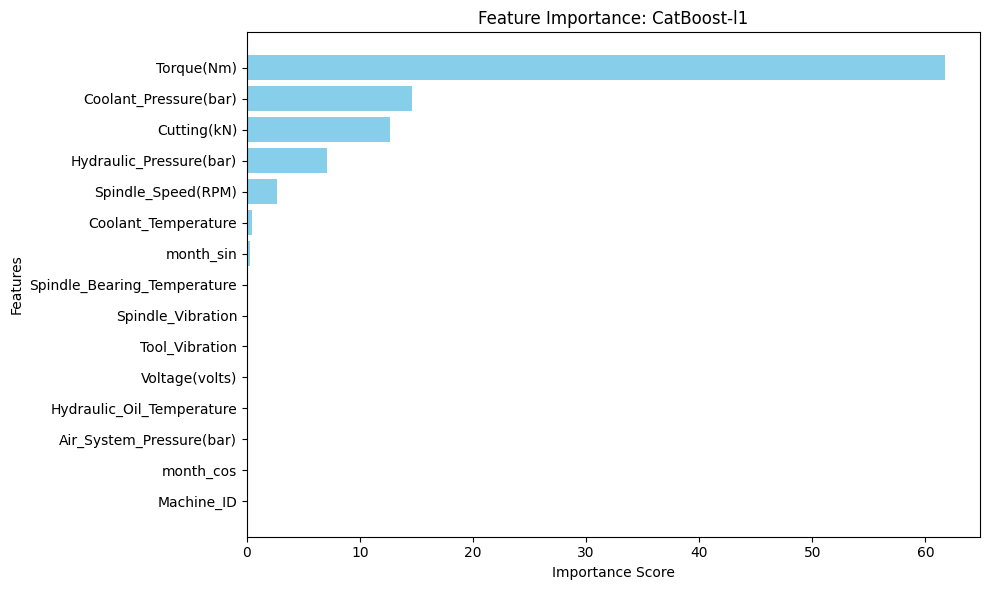

In [29]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l1_cat, y_l1_cat, best_cat, "l1")

### L2

In [30]:
# return metrics for CATBoost
l2_cat_metrics, X_l2_cat, y_l2_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l2, y_l2)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
0:	learn: 0.6682194	total: 1.16ms	remaining: 318ms
1:	learn: 0.6457547	total: 2.21ms	remaining: 300ms
2:	learn: 0.6242119	total: 3.3ms	remaining: 298ms
3:	learn: 0.6036710	total: 4.13ms	remaining: 279ms
4:	learn: 0.5638613	total: 5.01ms	remaining: 270ms
5:	learn: 0.5415169	total: 5.81ms	remaining: 260ms
6:	learn: 0.5246732	total: 6.53ms	remaining: 249ms
7:	learn: 0.5039751	total: 7.21ms	remaining: 240ms
8:	learn: 0.4896315	total: 7.81ms	remaining: 230ms
9:	learn: 0.4758099	total: 8.59ms	remaining: 227ms
10:	learn: 0.4594468	total: 9.54ms	remaining: 228ms
11:	learn: 0.4399460	total: 10.1ms	remaining: 221ms
12:	learn: 0.4182936	total: 11.3ms	remaining: 227ms
13:	learn: 0.4083680	total: 12.5ms	remaining: 232ms
14:	learn: 0.3934970	total: 13.2ms	remaining: 228ms
15:	learn: 0.3803452	total: 13.8ms	remaining: 223ms
16:	learn: 0.3635460	total: 14.6ms	remaining: 221ms
17:	learn: 0.3482864	total: 15.6ms	remaining: 222ms
18:	learn: 0.3341390	total:

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8614EDDF0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AE480> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

203:	learn: 0.0391235	total: 161ms	remaining: 55.2ms
204:	learn: 0.0390750	total: 162ms	remaining: 54.5ms
205:	learn: 0.0390648	total: 163ms	remaining: 53.7ms
206:	learn: 0.0390315	total: 164ms	remaining: 53ms
207:	learn: 0.0389835	total: 165ms	remaining: 52.2ms
208:	learn: 0.0389593	total: 165ms	remaining: 51.4ms
209:	learn: 0.0389095	total: 166ms	remaining: 50.7ms
210:	learn: 0.0388911	total: 167ms	remaining: 50ms
211:	learn: 0.0387198	total: 168ms	remaining: 49.2ms
212:	learn: 0.0385468	total: 169ms	remaining: 48.4ms
213:	learn: 0.0383917	total: 170ms	remaining: 47.6ms
214:	learn: 0.0382560	total: 171ms	remaining: 46.9ms
215:	learn: 0.0379260	total: 172ms	remaining: 46.2ms
216:	learn: 0.0376973	total: 173ms	remaining: 45.6ms
217:	learn: 0.0372755	total: 174ms	remaining: 44.8ms
218:	learn: 0.0370039	total: 175ms	remaining: 44ms
219:	learn: 0.0368200	total: 176ms	remaining: 43.2ms
220:	learn: 0.0367118	total: 177ms	remaining: 42.4ms
221:	learn: 0.0366678	total: 177ms	remaining: 41.6ms

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AE480> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AE480> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

106:	learn: 0.0448701	total: 95.5ms	remaining: 149ms
107:	learn: 0.0442226	total: 96.8ms	remaining: 149ms
108:	learn: 0.0436633	total: 97.5ms	remaining: 148ms
109:	learn: 0.0432554	total: 98.3ms	remaining: 147ms
110:	learn: 0.0420331	total: 99.4ms	remaining: 146ms
111:	learn: 0.0414086	total: 100ms	remaining: 145ms
112:	learn: 0.0409547	total: 101ms	remaining: 144ms
113:	learn: 0.0408365	total: 102ms	remaining: 143ms
114:	learn: 0.0407140	total: 103ms	remaining: 142ms
115:	learn: 0.0403827	total: 104ms	remaining: 141ms
116:	learn: 0.0400353	total: 105ms	remaining: 141ms
117:	learn: 0.0392853	total: 106ms	remaining: 140ms
118:	learn: 0.0390697	total: 106ms	remaining: 139ms
119:	learn: 0.0384622	total: 107ms	remaining: 138ms
120:	learn: 0.0377490	total: 108ms	remaining: 137ms
121:	learn: 0.0373593	total: 125ms	remaining: 156ms
122:	learn: 0.0371837	total: 126ms	remaining: 155ms
123:	learn: 0.0368653	total: 127ms	remaining: 154ms
124:	learn: 0.0365651	total: 128ms	remaining: 153ms
125:	le

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876AA0050> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C876AA0050> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

7:	learn: 0.5050761	total: 7.04ms	remaining: 234ms
8:	learn: 0.4897095	total: 8.47ms	remaining: 249ms
9:	learn: 0.4698982	total: 9.48ms	remaining: 250ms
10:	learn: 0.4551101	total: 10.6ms	remaining: 253ms
11:	learn: 0.4289633	total: 11.6ms	remaining: 252ms
12:	learn: 0.4126710	total: 12.4ms	remaining: 248ms
13:	learn: 0.4002610	total: 13.2ms	remaining: 244ms
14:	learn: 0.3911194	total: 14.1ms	remaining: 243ms
15:	learn: 0.3772597	total: 15ms	remaining: 242ms
16:	learn: 0.3675985	total: 15.8ms	remaining: 239ms
17:	learn: 0.3527182	total: 16.6ms	remaining: 236ms
18:	learn: 0.3354268	total: 17.5ms	remaining: 235ms
19:	learn: 0.3274543	total: 18.6ms	remaining: 236ms
20:	learn: 0.3160335	total: 19.3ms	remaining: 233ms
21:	learn: 0.3016127	total: 20ms	remaining: 229ms
22:	learn: 0.2906329	total: 21.1ms	remaining: 230ms
23:	learn: 0.2829685	total: 22.3ms	remaining: 233ms
24:	learn: 0.2732825	total: 23.2ms	remaining: 231ms
25:	learn: 0.2602177	total: 24.2ms	remaining: 231ms
26:	learn: 0.255547

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C875984D10> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C875984D10> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

141:	learn: 0.0549547	total: 111ms	remaining: 103ms
142:	learn: 0.0543114	total: 112ms	remaining: 103ms
143:	learn: 0.0542571	total: 113ms	remaining: 102ms
144:	learn: 0.0539302	total: 114ms	remaining: 101ms
145:	learn: 0.0538592	total: 115ms	remaining: 100ms
146:	learn: 0.0537272	total: 115ms	remaining: 99.5ms
147:	learn: 0.0532259	total: 116ms	remaining: 98.7ms
148:	learn: 0.0527034	total: 117ms	remaining: 97.9ms
149:	learn: 0.0524545	total: 117ms	remaining: 97.1ms
150:	learn: 0.0523436	total: 118ms	remaining: 96.3ms
151:	learn: 0.0517593	total: 119ms	remaining: 95.4ms
152:	learn: 0.0514415	total: 120ms	remaining: 94.7ms
153:	learn: 0.0510870	total: 121ms	remaining: 93.9ms
154:	learn: 0.0509887	total: 121ms	remaining: 93.1ms
155:	learn: 0.0509532	total: 122ms	remaining: 92.3ms
156:	learn: 0.0506534	total: 123ms	remaining: 91.4ms
157:	learn: 0.0502840	total: 124ms	remaining: 90.7ms
158:	learn: 0.0501535	total: 124ms	remaining: 89.9ms
159:	learn: 0.0495237	total: 125ms	remaining: 89.1m

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C87590E420> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C87590E420> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

48:	learn: 0.1622363	total: 41.7ms	remaining: 192ms
49:	learn: 0.1583586	total: 42.5ms	remaining: 190ms
50:	learn: 0.1562686	total: 43.3ms	remaining: 189ms
51:	learn: 0.1545975	total: 44.1ms	remaining: 188ms
52:	learn: 0.1511481	total: 44.9ms	remaining: 187ms
53:	learn: 0.1472495	total: 45.7ms	remaining: 186ms
54:	learn: 0.1438329	total: 46.5ms	remaining: 185ms
55:	learn: 0.1407872	total: 47.2ms	remaining: 184ms
56:	learn: 0.1363213	total: 48.1ms	remaining: 183ms
57:	learn: 0.1331454	total: 48.9ms	remaining: 182ms
58:	learn: 0.1295202	total: 49.7ms	remaining: 181ms
59:	learn: 0.1281850	total: 50.5ms	remaining: 180ms
60:	learn: 0.1267647	total: 51.2ms	remaining: 179ms
61:	learn: 0.1246484	total: 52ms	remaining: 178ms
62:	learn: 0.1229628	total: 52.9ms	remaining: 177ms
63:	learn: 0.1207948	total: 53.7ms	remaining: 176ms
64:	learn: 0.1189764	total: 54.5ms	remaining: 175ms
65:	learn: 0.1166661	total: 55.5ms	remaining: 175ms
66:	learn: 0.1150409	total: 56.2ms	remaining: 174ms
67:	learn: 0.1

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8758C71D0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8758C71D0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

0:	learn: 0.6671310	total: 1.36ms	remaining: 370ms
1:	learn: 0.6389181	total: 2.8ms	remaining: 381ms
2:	learn: 0.6124813	total: 4.21ms	remaining: 380ms
3:	learn: 0.5928653	total: 5.34ms	remaining: 361ms
4:	learn: 0.5755550	total: 6.54ms	remaining: 352ms
5:	learn: 0.5544469	total: 7.65ms	remaining: 342ms
6:	learn: 0.5376747	total: 8.8ms	remaining: 336ms
7:	learn: 0.5159883	total: 9.66ms	remaining: 321ms
8:	learn: 0.4959094	total: 10.5ms	remaining: 309ms
9:	learn: 0.4827450	total: 11.6ms	remaining: 306ms
10:	learn: 0.4595822	total: 12.6ms	remaining: 302ms
11:	learn: 0.4436601	total: 13.7ms	remaining: 299ms
12:	learn: 0.4310765	total: 14.8ms	remaining: 298ms
13:	learn: 0.4102864	total: 16.2ms	remaining: 301ms
14:	learn: 0.3956283	total: 17ms	remaining: 293ms
15:	learn: 0.3719737	total: 17.6ms	remaining: 284ms
16:	learn: 0.3610994	total: 18.7ms	remaining: 283ms
17:	learn: 0.3503943	total: 19.9ms	remaining: 283ms
18:	learn: 0.3374053	total: 20.8ms	remaining: 279ms
19:	learn: 0.3248118	total

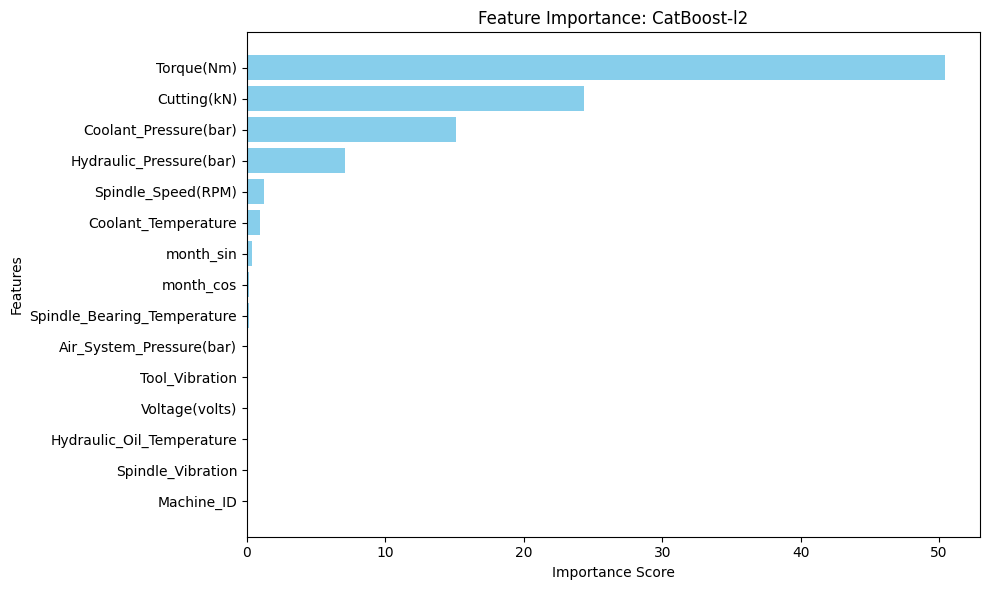

In [31]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l2_cat, y_l2_cat, best_cat, "l2")

### L3

In [32]:
# return metrics for CATBoost
l3_cat_metrics, X_l3_cat, y_l3_cat = mf.get_score_diff_machines("CatBoost", best_cat, X_l3, y_l3)

{'Machine_Failure': 0, 'No_Machine_Failure': 1}
0:	learn: 0.6685121	total: 1.24ms	remaining: 338ms
1:	learn: 0.6392574	total: 2.3ms	remaining: 313ms
2:	learn: 0.6144869	total: 3.42ms	remaining: 309ms
3:	learn: 0.5921685	total: 4.71ms	remaining: 318ms
4:	learn: 0.5810150	total: 5.83ms	remaining: 313ms
5:	learn: 0.5615562	total: 6.77ms	remaining: 302ms
6:	learn: 0.5446231	total: 8.37ms	remaining: 319ms
7:	learn: 0.5248419	total: 10.1ms	remaining: 336ms
8:	learn: 0.5080275	total: 11.5ms	remaining: 339ms
9:	learn: 0.4823089	total: 12.6ms	remaining: 333ms
10:	learn: 0.4670786	total: 13.5ms	remaining: 323ms
11:	learn: 0.4440886	total: 14.7ms	remaining: 320ms
12:	learn: 0.4259126	total: 15.8ms	remaining: 317ms
13:	learn: 0.4073453	total: 16.8ms	remaining: 312ms
14:	learn: 0.3908792	total: 17.6ms	remaining: 303ms
15:	learn: 0.3794221	total: 18.5ms	remaining: 299ms
16:	learn: 0.3609281	total: 19.2ms	remaining: 290ms
17:	learn: 0.3431041	total: 20.4ms	remaining: 291ms
18:	learn: 0.3332638	total:

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8614EDDF0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

171:	learn: 0.0531633	total: 152ms	remaining: 89.9ms
172:	learn: 0.0528744	total: 152ms	remaining: 88.9ms
173:	learn: 0.0524357	total: 153ms	remaining: 88.1ms
174:	learn: 0.0517896	total: 154ms	remaining: 87.2ms
175:	learn: 0.0511775	total: 155ms	remaining: 86.2ms
176:	learn: 0.0509239	total: 156ms	remaining: 85.3ms
177:	learn: 0.0505797	total: 157ms	remaining: 84.4ms
178:	learn: 0.0501832	total: 157ms	remaining: 83.5ms
179:	learn: 0.0501034	total: 158ms	remaining: 82.6ms
180:	learn: 0.0500735	total: 159ms	remaining: 81.6ms
181:	learn: 0.0497144	total: 160ms	remaining: 80.7ms
182:	learn: 0.0495486	total: 160ms	remaining: 79.7ms
183:	learn: 0.0495180	total: 161ms	remaining: 78.7ms
184:	learn: 0.0492322	total: 162ms	remaining: 77.8ms
185:	learn: 0.0490921	total: 163ms	remaining: 77ms
186:	learn: 0.0489381	total: 163ms	remaining: 76ms
187:	learn: 0.0486896	total: 164ms	remaining: 75.1ms
188:	learn: 0.0486577	total: 165ms	remaining: 74.2ms
189:	learn: 0.0485570	total: 166ms	remaining: 73.5

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769620C0> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

39:	learn: 0.1739749	total: 33ms	remaining: 193ms
40:	learn: 0.1689898	total: 34.7ms	remaining: 197ms
41:	learn: 0.1660164	total: 35.3ms	remaining: 195ms
42:	learn: 0.1633963	total: 36.2ms	remaining: 194ms
43:	learn: 0.1568352	total: 37ms	remaining: 194ms
44:	learn: 0.1529260	total: 37.9ms	remaining: 193ms
45:	learn: 0.1497271	total: 38.9ms	remaining: 193ms
46:	learn: 0.1444574	total: 39.6ms	remaining: 191ms
47:	learn: 0.1402609	total: 40.3ms	remaining: 190ms
48:	learn: 0.1378683	total: 41.3ms	remaining: 190ms
49:	learn: 0.1357454	total: 42ms	remaining: 188ms
50:	learn: 0.1343255	total: 42.6ms	remaining: 186ms
51:	learn: 0.1307221	total: 43.5ms	remaining: 186ms
52:	learn: 0.1268998	total: 44.7ms	remaining: 187ms
53:	learn: 0.1250608	total: 45.4ms	remaining: 185ms
54:	learn: 0.1237789	total: 46.3ms	remaining: 184ms
55:	learn: 0.1212826	total: 47.7ms	remaining: 186ms
56:	learn: 0.1189767	total: 48.6ms	remaining: 185ms
57:	learn: 0.1141679	total: 49.5ms	remaining: 184ms
58:	learn: 0.11322

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AE480> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C8769AE480> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

183:	learn: 0.0276319	total: 147ms	remaining: 72.1ms
184:	learn: 0.0272868	total: 148ms	remaining: 71.3ms
185:	learn: 0.0270727	total: 149ms	remaining: 70.6ms
186:	learn: 0.0270574	total: 150ms	remaining: 69.7ms
187:	learn: 0.0268283	total: 151ms	remaining: 69ms
188:	learn: 0.0268056	total: 151ms	remaining: 68.1ms
189:	learn: 0.0267552	total: 152ms	remaining: 67.2ms
190:	learn: 0.0267444	total: 153ms	remaining: 66.4ms
191:	learn: 0.0263856	total: 154ms	remaining: 65.8ms
192:	learn: 0.0263689	total: 155ms	remaining: 65ms
193:	learn: 0.0261676	total: 156ms	remaining: 64.3ms
194:	learn: 0.0259611	total: 157ms	remaining: 63.6ms
195:	learn: 0.0257080	total: 158ms	remaining: 62.8ms
196:	learn: 0.0254405	total: 159ms	remaining: 62.1ms
197:	learn: 0.0254300	total: 159ms	remaining: 61.2ms
198:	learn: 0.0249985	total: 161ms	remaining: 60.5ms
199:	learn: 0.0241721	total: 162ms	remaining: 59.9ms
200:	learn: 0.0239873	total: 163ms	remaining: 59.1ms
201:	learn: 0.0239084	total: 164ms	remaining: 58.3

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C864DEE840> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C864DEE840> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

111:	learn: 0.0755996	total: 89.1ms	remaining: 129ms
112:	learn: 0.0742274	total: 89.8ms	remaining: 128ms
113:	learn: 0.0738694	total: 90.5ms	remaining: 127ms
114:	learn: 0.0728400	total: 91.3ms	remaining: 126ms
115:	learn: 0.0718506	total: 92.4ms	remaining: 126ms
116:	learn: 0.0703014	total: 93.1ms	remaining: 125ms
117:	learn: 0.0697992	total: 93.9ms	remaining: 124ms
118:	learn: 0.0694389	total: 94.9ms	remaining: 124ms
119:	learn: 0.0689867	total: 95.8ms	remaining: 123ms
120:	learn: 0.0688172	total: 96.6ms	remaining: 122ms
121:	learn: 0.0685654	total: 97.2ms	remaining: 121ms
122:	learn: 0.0684943	total: 97.8ms	remaining: 120ms
123:	learn: 0.0677937	total: 98.5ms	remaining: 119ms
124:	learn: 0.0673932	total: 99.2ms	remaining: 118ms
125:	learn: 0.0666175	total: 99.9ms	remaining: 117ms
126:	learn: 0.0665002	total: 101ms	remaining: 116ms
127:	learn: 0.0661454	total: 101ms	remaining: 116ms
128:	learn: 0.0655632	total: 102ms	remaining: 115ms
129:	learn: 0.0649712	total: 103ms	remaining: 114

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C864E6DE20> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C864E6DE20> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

14:	learn: 0.3947352	total: 14ms	remaining: 241ms
15:	learn: 0.3846641	total: 14.9ms	remaining: 240ms
16:	learn: 0.3665818	total: 15.7ms	remaining: 237ms
17:	learn: 0.3582779	total: 16.6ms	remaining: 236ms
18:	learn: 0.3511810	total: 17.4ms	remaining: 234ms
19:	learn: 0.3417303	total: 18.2ms	remaining: 231ms
20:	learn: 0.3326181	total: 19ms	remaining: 229ms
21:	learn: 0.3245412	total: 19.8ms	remaining: 227ms
22:	learn: 0.3162132	total: 20.5ms	remaining: 224ms
23:	learn: 0.3066905	total: 21.3ms	remaining: 222ms
24:	learn: 0.2998596	total: 22.1ms	remaining: 220ms
25:	learn: 0.2895906	total: 22.7ms	remaining: 217ms
26:	learn: 0.2828746	total: 23.5ms	remaining: 215ms
27:	learn: 0.2684691	total: 24.3ms	remaining: 214ms
28:	learn: 0.2587807	total: 25.2ms	remaining: 213ms
29:	learn: 0.2533110	total: 26ms	remaining: 211ms
30:	learn: 0.2470040	total: 26.8ms	remaining: 210ms
31:	learn: 0.2387354	total: 27.6ms	remaining: 209ms
32:	learn: 0.2312551	total: 28.6ms	remaining: 209ms
33:	learn: 0.22848

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C87589F740> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit from `sklearn.base.BaseEstimator` and other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.ClusterMixin`, and `sklearn.base.OutlierMixin`.
  warnings.warn(
C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:322: FutureWarning: Estimator <catboost.core.CatBoostClassifier object at 0x000002C87589F740> has no __sklearn_tags__ attribute, which is defined in `sklearn.base.BaseEstimator`. This will raise an error in scikit-learn 1.8. Please define the __sklearn_tags__ method, or inherit 

0:	learn: 0.6644484	total: 1.27ms	remaining: 347ms
1:	learn: 0.6338426	total: 2.47ms	remaining: 335ms
2:	learn: 0.6110918	total: 3.97ms	remaining: 358ms
3:	learn: 0.5929560	total: 4.88ms	remaining: 329ms
4:	learn: 0.5706712	total: 5.58ms	remaining: 300ms
5:	learn: 0.5495977	total: 6.32ms	remaining: 282ms
6:	learn: 0.5271128	total: 7.03ms	remaining: 268ms
7:	learn: 0.5106655	total: 7.69ms	remaining: 256ms
8:	learn: 0.4964661	total: 8.38ms	remaining: 247ms
9:	learn: 0.4757311	total: 9.11ms	remaining: 240ms
10:	learn: 0.4624081	total: 9.8ms	remaining: 234ms
11:	learn: 0.4459957	total: 10.4ms	remaining: 227ms
12:	learn: 0.4333781	total: 11.1ms	remaining: 222ms
13:	learn: 0.4154968	total: 11.7ms	remaining: 216ms
14:	learn: 0.4021221	total: 12.4ms	remaining: 215ms
15:	learn: 0.3809214	total: 13ms	remaining: 210ms
16:	learn: 0.3685803	total: 13.9ms	remaining: 209ms
17:	learn: 0.3589070	total: 14.5ms	remaining: 206ms
18:	learn: 0.3450947	total: 15.1ms	remaining: 202ms
19:	learn: 0.3351278	tota

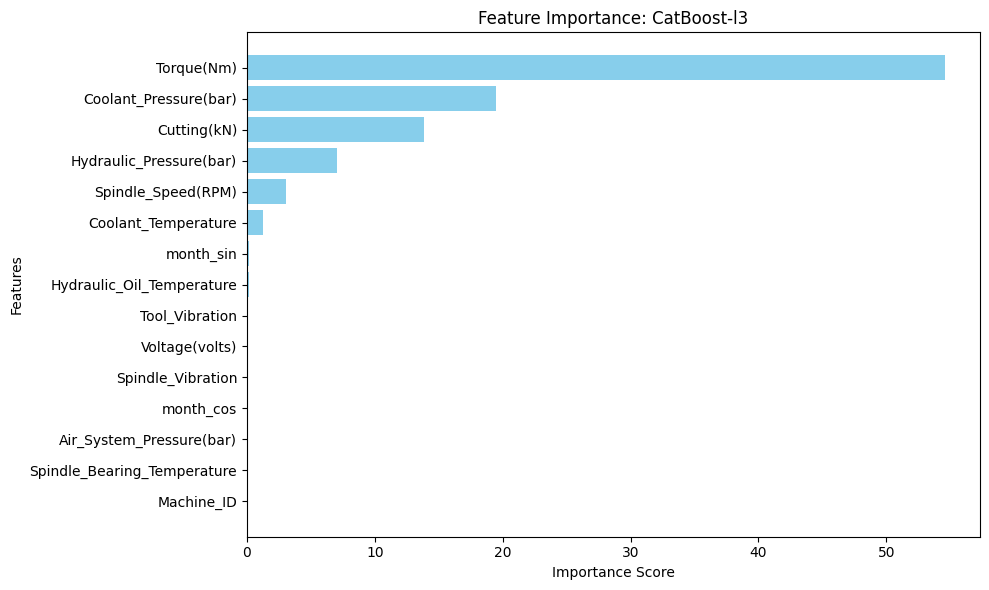

In [33]:
# feature importances
feature_importance_diff_machines("CatBoost", X_l3_cat, y_l3_cat, best_cat, "l3")